In [99]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from tqdm import tnrange, tqdm_notebook
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import sklearn
from sklearn.model_selection import GridSearchCV

## Import the dataset

In [100]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [101]:
0.2*1338

267.6

In [102]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Analyzing each variable

In [103]:
def statsCost(feature,histname,scattername):
    plt.figure()
    sns.histplot(insurance[feature])
    plt.savefig(histname)
    plt.figure()
    sns.scatterplot(x = insurance[feature],y = insurance['charges'])
    plt.savefig(scattername)

## Age

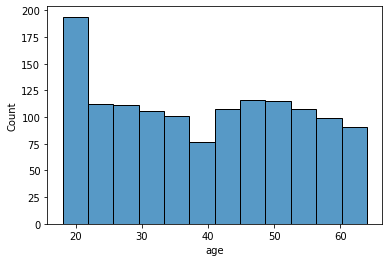

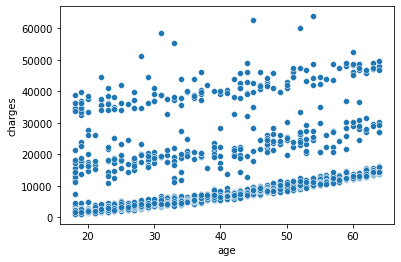

In [104]:
statsCost('age','agehist.png','agescatter.png')

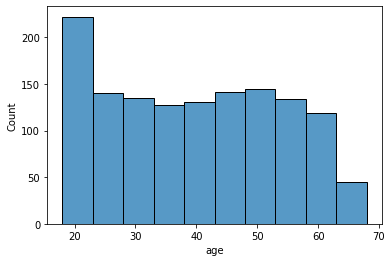

In [105]:
sns.histplot(insurance["age"],binwidth=5)
plt.savefig('agehist.png')

In [106]:
insurance["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

## Sex

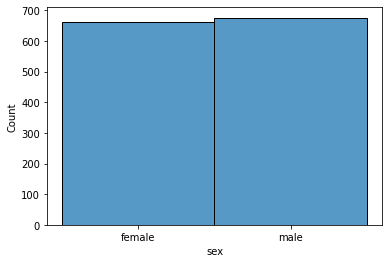

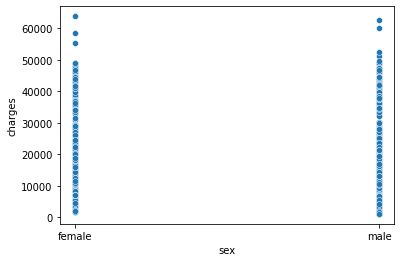

In [107]:
statsCost('sex','sexhist.png','sexscatter.png')

In [108]:
insurance.groupby(by = "sex").size()

sex
female    662
male      676
dtype: int64

In [109]:
insurance.groupby(by = ["sex"])["charges"].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

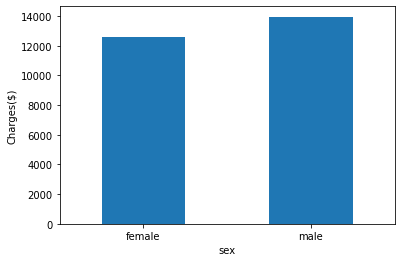

In [120]:
insurance.groupby(by = ["sex"])["charges"].mean().plot(kind = 'bar')
plt.ylabel('Charges($)')
plt.xticks(rotation = 0)
plt.savefig('sexgrouped.png')

## BMI

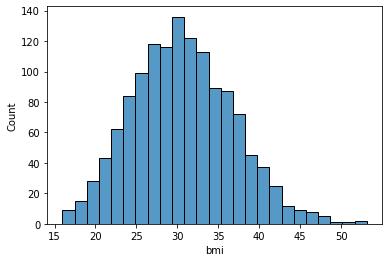

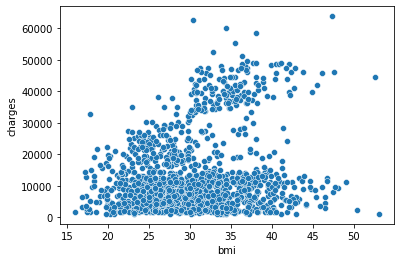

In [13]:
statsCost('bmi','bmihist.png','bmiscatter.png')

In [14]:
insurance['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

## Children

In [15]:
insurance['children'].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

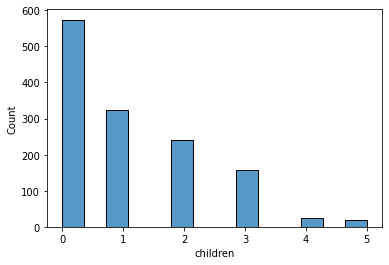

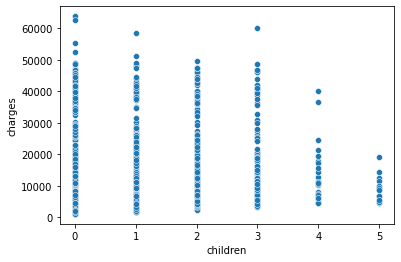

In [16]:
statsCost('children','childrenhist.png','childrenscatter.png')

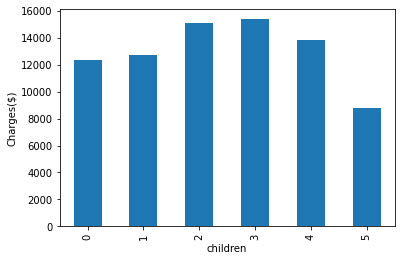

In [112]:
insurance.groupby(by = 'children')['charges'].mean().plot(kind = 'bar')
plt.ylabel('Charges($)')
plt.savefig('childrengrouped.png')

## Smoker

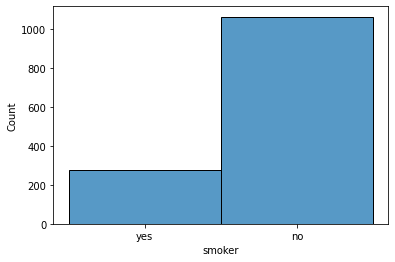

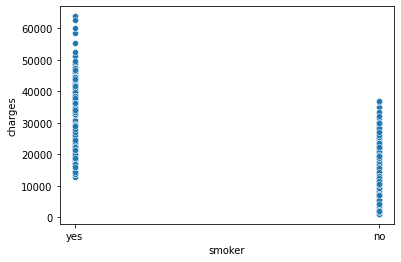

In [18]:
statsCost('smoker','smokerhist.png','smokerscatter.png')

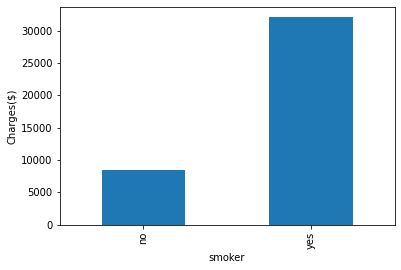

In [113]:
insurance.groupby(by = 'smoker')['charges'].mean().plot(kind = 'bar')
plt.ylabel('Charges($)')
plt.savefig('smokergrouped.png')

## Region

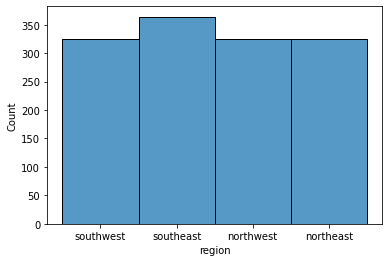

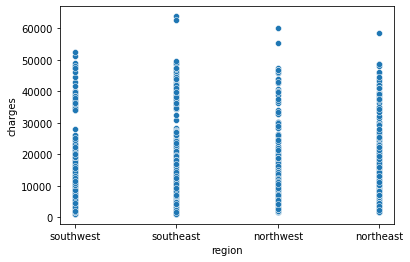

In [20]:
statsCost('region','regionhist.png','regionscatter.png')

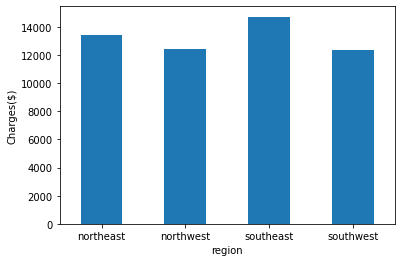

In [114]:
insurance.groupby(by = 'region')['charges'].mean().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('Charges($)')
plt.savefig('regiongrouped.png')

## Other stuff

## Determine correlation matrix 

<AxesSubplot:>

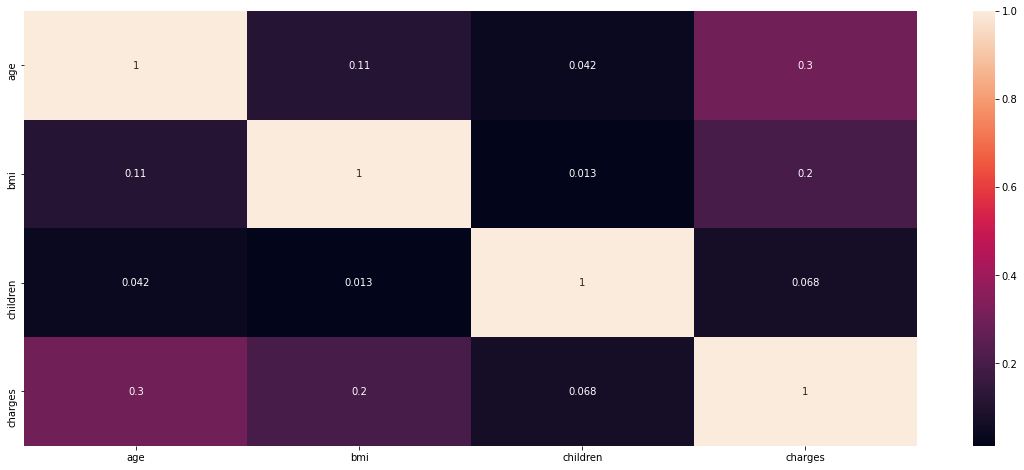

In [22]:
plt.figure(figsize=(20,8))
sns.heatmap(insurance.corr(),annot = True)

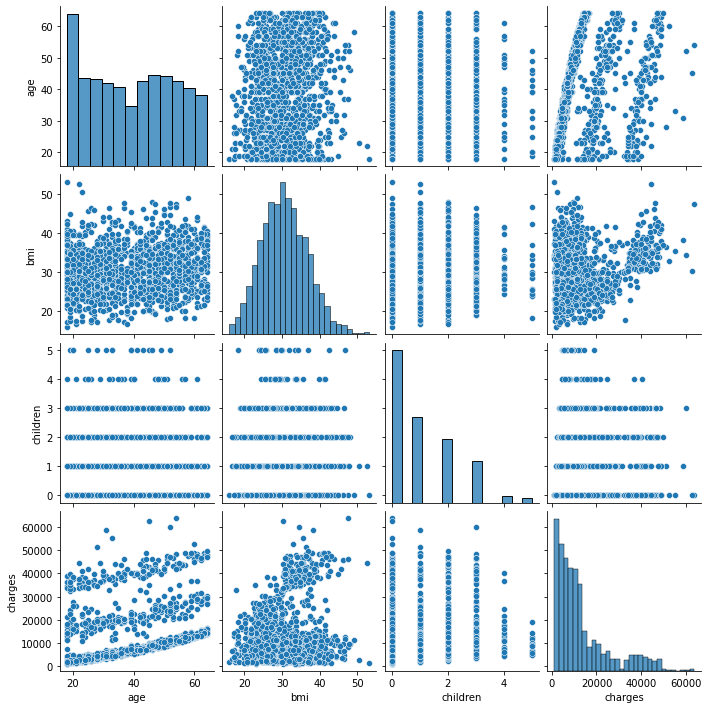

In [23]:
sns.pairplot(insurance)

# Test Regression Models

## Encode variables

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
encoder = LabelEncoder()

In [26]:
insurance["sex_class"] = encoder.fit_transform(insurance["sex"])
insurance["smoker_class"] = encoder.fit_transform(insurance["smoker"])
insurance["region_class"] = encoder.fit_transform(insurance["region"])

In [27]:
insurance  = insurance.drop(columns=["sex","smoker","region"])

C:\Users\fahee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region_class', ylabel='charges'>

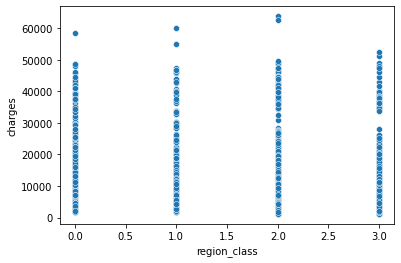

In [28]:
sns.scatterplot(insurance['region_class'],insurance['charges'])

## Split train and test

In [29]:
features = ["age","sex_class","bmi","children","smoker_class","region_class"]

In [30]:
def trainTestModel(df, features,test_size):
    X = insurance[features]
    y = insurance["charges"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train,X_test,y_train,y_test

In [31]:
X_train,X_test,y_train,y_test = trainTestModel(insurance,features,0.2)

In [32]:
X = insurance[features]
y = insurance['charges']

## Try linear regression first

In [33]:
from statsmodels import stats

In [34]:
linreg = LinearRegression()

In [35]:
linreg.fit(X_train,y_train)

LinearRegression()

In [36]:
r_squared_linear = linreg.score(X_test,y_test)
r_squared_linear

0.7833463107364539

In [37]:
linreg.score(X_train,y_train)

0.7417049283233981

In [38]:
y_test = np.array(y_test)

In [39]:
y_predict = linreg.predict(np.array(X_test))

In [40]:
# cross_val_score(linreg,np.array(X),np.array(y),cv = 5,scoring=)

In [41]:
lin_rmse = mean_squared_error(y_test,y_predict,squared=False)

In [42]:
MAE_lin = mean_absolute_error(y_true=y_test,y_pred=y_predict)

### Compute adjusted R squared

In [43]:
adjusted_R2_linear = 1-((1-r_squared_linear)*(X_test.shape[0]-1)/(X_test.shape[0]-len(features)-1))
adjusted_R2_linear

0.7783657661556826

In [44]:
np.average(linreg.predict(X_test))

13193.09570586944

### Residual Plot

In [45]:
def createResidual(model):
    xs = [i for i in range(268)]
    plt.figure()
    y_diff = y_test - model.predict(X_test)
    # plt.set_title("Residuals")
    plt.plot([0, 300], [0, 0], "r")
    plt.scatter(x=xs, y=y_diff, s=1.0)
    plt.title(str(model)+ ' residuals')

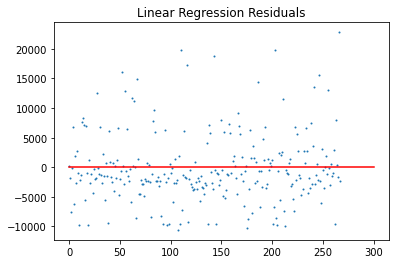

In [46]:
createResidual(linreg)
plt.title('Linear Regression Residuals')
plt.savefig('residuallinear.png',dpi = 500)

## Try best subset regression

In [47]:
features = ["age","bmi","children","sex_class","smoker_class","region_class"]
X = insurance[features]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
def subSet(X_train,X_test,y_train,y_test):
    linreg = LinearRegression()
    scores = []
    feature_list = []
    for k in tnrange(1,len(X_train.columns) + 1, desc = 'Loop...'):
        for combo in itertools.combinations(X_train.columns,k):
            linreg.fit(X_train[list(combo)],y_train)
            scores.append(linreg.score(X_test[list(combo)],y_test))
            feature_list.append(combo)
    new_df = pd.DataFrame({"Features":feature_list,"Score":scores})
    return new_df

In [50]:
df = subSet(X_train,X_test,y_train,y_test)
df.sort_values(by = "Score",ascending=False)[1:10]

<ipython-input-49-b5f24479f197>:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X_train.columns) + 1, desc = 'Loop...'):


,Features,Score
58,"(age, bmi, children, smoker_class, region_class)",0.783311
56,"(age, bmi, children, sex_class, smoker_class)",0.781130
42,"(age, bmi, children, smoker_class)",0.781115
59,"(age, bmi, sex_class, smoker_class, region_class)",0.779703
46,"(age, bmi, smoker_class, region_class)",0.779700
23,"(age, bmi, smoker_class)",0.777693
44,"(age, bmi, sex_class, smoker_class)",0.777676
47,"(age, children, sex_class, smoker_class)",0.757938
26,"(age, children, smoker_class)",0.757928


## Try Stepwise Regression

In [51]:
import statsmodels.api as sm

> Drop each column depending on p-value using statsmodels OLS

## Train and Test Data

In [52]:
def trainTestModel(df, features,test_size):
    X = insurance[features]
    y = insurance["charges"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train,X_test,y_train,y_test

In [53]:
features = ["age","bmi","children","sex_class","smoker_class","region_class"]
X_train,X_test,y_train,y_test = trainTestModel(insurance,features,0.2)

## Fit Ordinary Least Squares

In [54]:
results = sm.OLS(y_train,X_train).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              1200.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                        0.00
Time:                        11:37:11   Log-Likelihood:                         -10903.
No. Observations:                1070   AIC:                                  2.182e+04
Df Residuals:                    1064   BIC:                                  2.185e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

> Note that the children feature has a p-value > 0.05, we can drop it and run model again

In [55]:
features = ["age","bmi","sex_class","smoker_class","region_class"]
X_train,X_test,y_train,y_test = trainTestModel(insurance,features,0.2)

In [56]:
results = sm.OLS(y_train,X_train).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              1439.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                        0.00
Time:                        11:37:11   Log-Likelihood:                         -10904.
No. Observations:                1070   AIC:                                  2.182e+04
Df Residuals:                    1065   BIC:                                  2.184e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# Lasso Regression

In [57]:
from sklearn.linear_model import Lasso

In [58]:
features = ["age","bmi","children","smoker_class","region_class","sex_class"]
X_train,X_test,y_train,y_test = trainTestModel(insurance,features,0.2)

In [59]:
alpha_lasso = [i*1 for i in range(25)]
score = []
rmse = []

In [60]:
for i in alpha_lasso:
    lasso_regress = Lasso(alpha= i)
    lasso_regress.fit(X_train,y_train)
    score.append(lasso_regress.score(X_test,y_test))
    y_predict = lasso_regress.predict(X_test)
    error = mean_squared_error(y_test,y_predict,squared=False)
    rmse.append(error)
df = pd.DataFrame({"Alpha":alpha_lasso,"Lasso Score":score,"RMSE":rmse})

<ipython-input-60-c19d67f55ff9>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_regress.fit(X_train,y_train)
C:\Users\fahee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\fahee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19945154824.072727, tolerance: 15443697.546846814
  model = cd_fast.enet_coordinate_descent(


In [61]:
parameters = {"alpha":[i*0.05 for i in range(1,100)]}
lasso_regress = Lasso(normalize=True)
clf = GridSearchCV(lasso_regress, parameters,cv = 10,scoring='r2')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(normalize=True),
             param_grid={'alpha': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25,
                                   0.30000000000000004, 0.35000000000000003,
                                   0.4, 0.45, 0.5, 0.55, 0.6000000000000001,
                                   0.65, 0.7000000000000001, 0.75, 0.8,
                                   0.8500000000000001, 0.9, 0.9500000000000001,
                                   1.0, 1.05, 1.1, 1.1500000000000001,
                                   1.2000000000000002, 1.25, 1.3, 1.35,
                                   1.4000000000000001, 1.4500000000000002, 1.5, ...]},
             scoring='r2')

In [62]:
clf.best_params_

{'alpha': 2.8000000000000003}

In [63]:
r_squared_lasso = clf.score(X_test,y_test)
r_squared_lasso

0.7818639521524311

In [64]:
clf.score(X_train,y_train)

0.7414070726694705

In [65]:
lasso_rmse = mean_squared_error(y_test,clf.predict(X_test),squared=False)

In [66]:
MAE_lasso = mean_absolute_error(y_true=y_test,y_pred=clf.predict(X_test))
MAE_lasso

4194.767823354719

In [67]:
adjusted_R2_lasso = 1-((1-r_squared_lasso)*(X_test.shape[0]-1)/(X_test.shape[0]-len(features)-1))
adjusted_R2_lasso

0.7768493303628318

In [68]:
np.average(clf.predict(X_test))

13197.079210049584

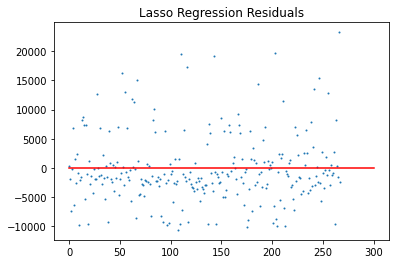

In [69]:
createResidual(clf)
plt.title('Lasso Regression Residuals')
plt.savefig('residuallasso.png',dpi = 500)

## Ridge Regression

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
features = ["age","bmi","children","smoker_class"]
X_train,X_test,y_train,y_test = trainTestModel(insurance,features,0.2)

In [72]:
from sklearn.linear_model import Ridge

In [73]:
parameters = {"alpha":[i*0.05 for i in range(1,100)]}
ridge_regress = Ridge(normalize=True)
clf = GridSearchCV(ridge_regress, parameters,cv = 10,scoring = 'r2',refit = 'neg_root_mean_squared_error')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(normalize=True),
             param_grid={'alpha': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25,
                                   0.30000000000000004, 0.35000000000000003,
                                   0.4, 0.45, 0.5, 0.55, 0.6000000000000001,
                                   0.65, 0.7000000000000001, 0.75, 0.8,
                                   0.8500000000000001, 0.9, 0.9500000000000001,
                                   1.0, 1.05, 1.1, 1.1500000000000001,
                                   1.2000000000000002, 1.25, 1.3, 1.35,
                                   1.4000000000000001, 1.4500000000000002, 1.5, ...]},
             refit='neg_root_mean_squared_error', scoring='r2')

In [74]:
clf.best_params_

{'alpha': 0.05}

In [75]:
# ridge = Ridge(alpha = 0.2).fit(X_train,y_train)
r_squared_ridge = clf.score(X_test,y_test)
r_squared_ridge

0.7774879506533514

In [76]:
clf.score(X_train,y_train)

0.7393528962551617

In [77]:
ridge_rmse = mean_squared_error(y_test,clf.predict(X_test),squared=False)

In [78]:
MAE_ridge = mean_absolute_error(y_true=y_test,y_pred=clf.predict(X_test))
MAE_ridge

4299.389734078191

In [79]:
adjusted_R2_ridge = 1-((1-r_squared_ridge)*(X_test.shape[0]-1)/(X_test.shape[0]-len(features)-1))
adjusted_R2_ridge

0.7741037369750754

In [80]:
np.average(clf.predict(X_test))

13206.597901019113

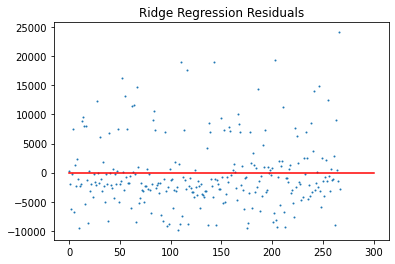

In [81]:
createResidual(clf)
plt.title('Ridge Regression Residuals')
plt.savefig('residualridge.png',dpi = 500)

## Combine all models

In [82]:
RMSE = [ridge_rmse,lasso_rmse,lin_rmse]
r_squared = [r_squared_ridge,r_squared_lasso,r_squared_linear]
MAE = [MAE_ridge,MAE_lasso,MAE_lin]
r_squared_adjusted = [adjusted_R2_ridge,adjusted_R2_lasso,adjusted_R2_linear]

In [83]:
combinedStats = {"Models":["Ridge","Lasso","Linear"],"${R^{2}}$":r_squared,"RMSE":RMSE,"MAE":MAE,
                 "Adjusted $R^{2}$":r_squared_adjusted}

In [84]:
stats = pd.DataFrame(combinedStats)
pd.set_option('display.colheader_justify', 'right')
stats

,Models,${R^{2}}$,RMSE,MAE,Adjusted $R^{2}$
0,Ridge,0.777488,5877.475087,4299.389734,0.774104
1,Lasso,0.781864,5819.393845,4194.767823,0.776849
2,Linear,0.783346,5799.587091,4186.508898,0.778366


C:\Users\fahee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


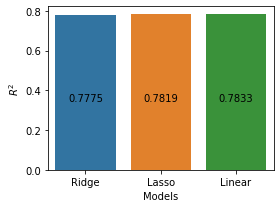

In [94]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.barplot(stats["Models"],stats["${R^{2}}$"])
ax.bar_label(ax.containers[-1], fmt='\n%.4f', label_type='center')
plt.tight_layout()
plt.savefig('r2bar.png',dpi = 500)

C:\Users\fahee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


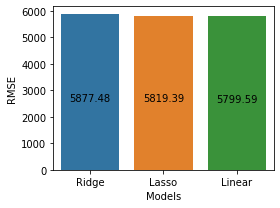

In [95]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.barplot(stats["Models"],stats["RMSE"])
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='center')
plt.tight_layout()
plt.savefig('rmsebar.png',dpi = 500)

C:\Users\fahee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


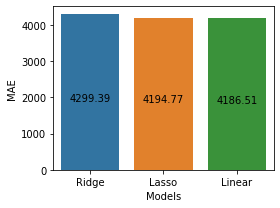

In [96]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.barplot(stats["Models"],stats["MAE"])
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='center')
plt.tight_layout()
plt.savefig('MAEbar.png')

C:\Users\fahee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


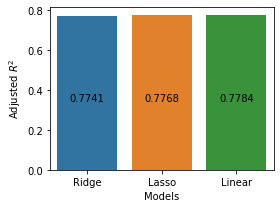

In [97]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.barplot(stats["Models"],stats["Adjusted $R^{2}$"])
ax.bar_label(ax.containers[-1], fmt='\n%.4f', label_type='center')
plt.tight_layout()
plt.savefig('Adjusted R^2.png')

In [89]:
[i for i in range(2,8,2)]

[2, 4, 6]

<Figure size 720x720 with 0 Axes>

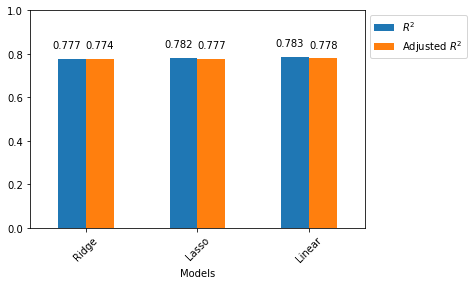

In [90]:
plt.figure(figsize=[10,10])
stats[["Models","${R^{2}}$","Adjusted $R^{2}$"]].plot.bar(x = 'Models')
plt.legend(bbox_to_anchor=(1.32,1), loc="upper right")
plt.xticks(rotation = 45)

for i in range(len(stats["Models"])):
    plt.text(i,stats["Adjusted $R^{2}$"][i]+0.05,s =np.round(stats["Adjusted $R^{2}$"][i],3))
    plt.text(i-0.3,stats["${R^{2}}$"][i]+0.05,s =np.round(stats["${R^{2}}$"][i],3))
plt.ylim([0,1])

plt.savefig('ModelOverview.png')